# <center>异常处理</center>

# 1.常见异常

## 1.1 什么是异常

In [1]:
print(a)

NameError: name 'a' is not defined

In [2]:
3 / 0

ZeroDivisionError: division by zero

In [3]:
print（"中文括号"）

SyntaxError: invalid character in identifier (<ipython-input-3-cb965658cd0b>, line 1)

In [15]:
list(tuple)

TypeError: 'tuple' object is not callable

## 1.2 异常处理

### 1.2.1 捕获异常

捕获异常的语法如下：<br>
&ensp;&ensp;try:<br>
&ensp;&ensp;&ensp;&ensp;<语句>　　#运行别的代码
&ensp;&ensp;<br>except <名字>:<br>
&ensp;&ensp;&ensp; &ensp;  <语句>　　#如果在try部分引发了异常

In [28]:
def div(a, b):
    try:
        return a / b
    except ZeroDivisionError:
         print("异常，除数为0")   

In [25]:
div(3,1)

3.0

In [29]:
div(3,0)

异常，除数为0


### 1.2.2 抛出异常

Python使用raise语句抛出一个指定异常。我们可以使用类（Exception的子类）或实例参数调用raise语句引发异常。使用类时程序会自动创建实例。

In [30]:
raise Exception

Exception: 

In [34]:
try:
    raise NameError("This is a NameError.")
except NameError:
    print("An exception happened!")  #只做了捕获

An exception happened!


In [35]:
try:
    raise NameError("This is a NameError.")
except NameError:   #捕获到异常
    print("An exception happened!")
    raise  # 抛出

An exception happened!


NameError: This is a NameError.

Python中重要的内建异常类
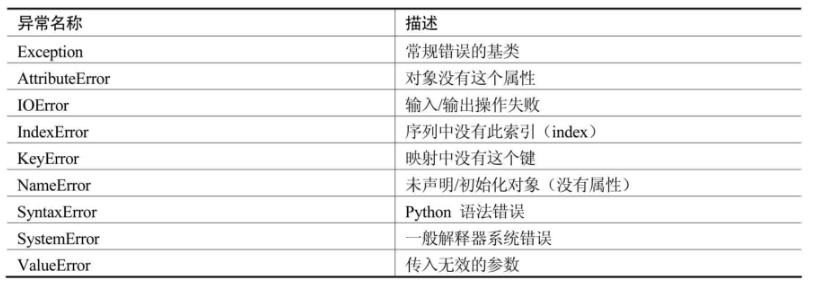

### 1.2.3 捕获多个异常

In [42]:
def div(a, b):
    try:
        return a / b
        n = name
    except ZeroDivisionError:
         print("异常，除数为0") 
    except NameError:
         print("未声明初始化对象")
div(3, 0)

异常，除数为0


In [41]:
def div(a, b):
    try:
        n = name
        return a / b
      
    except ZeroDivisionError:
         print("异常，除数为0") 
    except NameError:
         print("未声明初始化对象")
div(3, 0)

未声明初始化对象


### 1.2.4 捕捉对象

In [43]:
def div(a, b):
    try:
        return a / b
        n = name
    except ZeroDivisionError as e:
         print(e) 
            
div(3, 0)

division by zero


### 1.2.5 全捕捉

In [49]:
def div(a, b):
    try:
        c = a / b
    except:
         print("Have Error.")  # 具体的异常未指出
    else:
        print("No Error.")
             
div(3, 0)

Have Error.


In [50]:
div(3, 1)

No Error.


### 1.2.5 自定义异常

In [55]:
class MyError(Exception):
    def __init__(self):
        pass 
    def __str__(self):
        return "该异常为自定义异常。"
    
def my_error_test():
    try:
        raise MyError()
    except MyError as e:
        print(e)

my_error_test()

该异常为自定义异常。


### 1.2.6 finally子句

- 无论try子句中是否发生异常，finally都会被执行。
- try、except、else和finally可以组合使用，但要记得else在except之后，finally在except和else之后。

In [58]:
def div(a, b):
    try:
        c = a / b
    except:
         print("Have Error.")  # 具体的异常未指出
    else:
        print("No Error.")
    finally:
        print("Program End.")     

In [59]:
div(3, 0)

Have Error.
Program End.


In [60]:
div(3, 1)

No Error.
Program End.


### 1.2.7 异常和函数

异常和函数能够很自然地一起工作。如果异常在函数内引发而不被处理，就会传播至函数调用的地方。如果异常在函数调用的地方也没有被处理，就会继续传播，一直到达主程序。如果在主程序也没有做异常处理，异常就会被Python解释器捕获，输出一个错误信息，然后退出程序。

In [62]:
def div(a, b):
    return  a / b

def exp_fun(x,y):
    return div(x, y) * 2

def main(x,y ):
    exp_fun(x, y)
main(2, 0 )

ZeroDivisionError: division by zero

异常信息是以堆栈的形式被抛出的，因而是从下往上查看的。 由执行结果看到，div函数中产生的异常通过div和exp_fun函数传播，exp_fun中的异常通过exp_fun和main函数传播，传递到函数调用处由解释器处理，最终抛出堆栈的异常信息。

# 2 . 异常实例

要求：对给定的数组，前后两个数组相除，若被除数为0，则通过自定义异常打印出异常信息，并加入异常数数组中，若被除数不为0，则为正常数，加入正常数数组中。最后打印出正常数和异常数。

In [70]:
num_list = [1,0,2,0,3,4]

class NumberException(object):
    def __init__(self):
        pass
    
    @staticmethod
    def num_operation():
        normal_num_list = []
        exc_num_list = []
        
        for item in range(num_list.__len__()):
            if item == num_list.__len__() -1:
                a, b = num_list[item], num_list[item]
            else:
                a, b = num_list[item + 1], num_list[item]
        
            try:
                a / b 
                ret_str = "第"+ str(item + 1) + "个数是正常数，值为：" + str(num_list[item])
                normal_num_list.append(ret_str)
            except ZeroDivisionError as e:
                exc_list = MyError(num_list[item].__str__())
                ret_str = "第"+ str(item + 1) + "个数是异常数，值为：" + str(exc_list)
                exc_num_list.append(ret_str)
                print(MyError(num_list[item].__str__()))
            
        return normal_num_list, exc_num_list

class MyError(Exception):
    def __init__(self, num):
        self.num = num
        
    def __str__(self):
        return "错误信息：除数为0."
    
if __name__ == "__main__":
    normal_num_list, exc_num_list = NumberException.num_operation()
    print("正常数组为:", normal_num_list)
    print("异常数组为:", exc_num_list)

错误信息：除数为0.
错误信息：除数为0.
正常数组为: ['第1个数是正常数，值为：1', '第3个数是正常数，值为：2', '第5个数是正常数，值为：3', '第6个数是正常数，值为：4']
异常数组为: ['第2个数是异常数，值为：错误信息：除数为0.', '第4个数是异常数，值为：错误信息：除数为0.']
